# Analyze Sisma open data and Models Sisma2016 Variables in terms of Mobile Phone and Distances

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from stargazer.stargazer import Stargazer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
sisma = pd.read_csv('quake_data/sisma_all.csv')
sisma

,Comune,RCR FORECAST,RCR ACTUAL,OOPP,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,BUILIDING CONCLUDED,...,N_Interventi_priv2,Eur_Interventi_priv2,N_Interventi_pubb,Eur_Interventi_pubb,N_Interventi_pubb2,Eur_Interventi_pubb2,pop_iniz_2016,DELTA FORECAST ACTUAL,DELTA G DAMAGE Interventi,P RCR
0,Acquasanta Terme,0.441227,0.092334,0.000681,0.077002,0.042249,0.119250,0.059625,0.059625,0.033390,...,0.186031,76243.616460,0.004770,3978.240378,0.009540,5479.121635,2935.0,0.348893,-0.315843,0.209266
1,Amandola,0.260000,0.034167,0.001389,0.038889,0.014722,0.053611,0.023611,0.023611,0.008889,...,0.107222,42019.996183,0.004167,6492.626156,0.004444,8588.734444,3600.0,0.225833,-0.168889,0.131410
2,Apiro,0.193690,0.028046,0.008764,0.033304,0.016214,0.049518,0.014023,0.014023,0.007450,...,0.104733,35704.307967,0.003944,1849.156551,0.006573,6330.315951,2282.0,0.165644,-0.157318,0.144796
3,Appignano del Tronto,0.100788,0.020270,0.003941,0.027590,0.010698,0.038288,0.016892,0.016892,0.007883,...,0.044482,14376.140023,0.003378,1780.056064,0.002815,2684.923986,1776.0,0.080518,-0.083333,0.201117
4,Arquata del Tronto,1.743892,0.091828,0.009267,0.050548,0.084246,0.134794,0.071609,0.071609,0.033698,...,1.240101,425016.106504,0.032013,35180.126698,0.059815,155435.240101,1187.0,1.652064,-1.447346,0.052657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Micigliano,0.229508,0.024590,0.040984,0.081967,0.000000,0.081967,0.016393,0.016393,0.016393,...,0.049180,7678.638770,0.049180,28465.502541,0.016393,49328.377049,122.0,0.204918,-0.213115,0.107143
127,Poggio Bustone,0.021718,0.004826,0.002896,0.006757,0.000000,0.006757,0.002896,0.002896,0.002413,...,0.004344,1186.255294,0.002413,1981.777138,0.002413,836.923263,2072.0,0.016892,-0.017375,0.222222
128,Posta,0.460526,0.108187,0.029240,0.146199,0.017544,0.163743,0.052632,0.052632,0.032164,...,0.081871,28864.142091,0.017544,11703.311140,0.008772,14952.166667,684.0,0.352339,-0.283626,0.234921
129,Rieti,0.009916,0.002537,0.000529,0.004060,0.000529,0.004588,0.001480,0.001480,0.001015,...,0.001776,890.001649,0.000677,2091.773429,0.000486,1845.592134,47295.0,0.007379,-0.007696,0.255864


In [3]:
x_regression = pd.read_csv('quake_data/X_regression.csv')
ateco_names = ['AGRICOLTURE','REAL ESTATE','HOSPITALITY','MANUFACTURING','TECH SERVICES','WHOLE/RETAIL SALES','CONSTRUCTIONS','BUSINESS SUPPORT SERVICES','COMMUNICATION AND INFORMATION SERV.','LOGISTICS']
x_regression.head(2)  

,Comune,CRATER,PHONE_BEFORE,PHONE_AFTER,PCGH,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,...,LOGISTICS,INDUSTRIES,URBANIZATION,ABRUZZO,LAZIO,MARCHE,UMBRIA,ALT_MIN,ALT_MEAN,ALT_MED
0,Acciano,0.0,768.136868,819.775802,0.067226,-14.874264,-4.698444,-18.069677,67.559108,0.000000,...,0.000000,0.495522,3,1,0,0,0,454,858.6765,872
1,Accumoli,1.0,1851.535702,756.245581,-0.591558,-50.161357,-10.301179,-62.678257,0.000000,0.301518,...,0.174078,2.815267,3,0,1,0,0,670,1181.8030,1125


In [4]:
xy = x_regression.merge(sisma)
print(xy.columns)
xy

Index(['Comune', 'CRATER', 'PHONE_BEFORE', 'PHONE_AFTER', 'PCGH', 'MPE',
       'MPE_INIT', 'MPE_END', 'DISTANCE FROM EPICENTER', 'AGRICOLTURE',
       'REAL ESTATE', 'HOSPITALITY', 'MANUFACTURING', 'TECH SERVICES',
       'WHOLE/RETAIL SALES', 'CONSTRUCTIONS', 'BUSINESS SUPPORT SERVICES',
       'COMMUNICATION AND INFORMATION SERV.', 'LOGISTICS', 'INDUSTRIES',
       'URBANIZATION', 'ABRUZZO', 'LAZIO', 'MARCHE', 'UMBRIA', 'ALT_MIN',
       'ALT_MEAN', 'ALT_MED', 'RCR FORECAST', 'RCR ACTUAL', 'OOPP',
       'SMALL DAMAGE REQ.', 'GREAT DAMAGE REQ.', 'TOT REQ.', 'ACCEPTED REQ.',
       'BUILDING STARTED', 'BUILIDING CONCLUDED', 'SMALL DAMAGE',
       'GREAT DAMAGE', 'TOT. DAMAGE', 'N_Interventi', 'Eur_Interventi',
       'N_Interventi_priv', 'Eur_Interventi_priv', 'N_Interventi_priv2',
       'Eur_Interventi_priv2', 'N_Interventi_pubb', 'Eur_Interventi_pubb',
       'N_Interventi_pubb2', 'Eur_Interventi_pubb2', 'pop_iniz_2016',
       'DELTA FORECAST ACTUAL', 'DELTA G DAMAGE Interventi',

,Comune,CRATER,PHONE_BEFORE,PHONE_AFTER,PCGH,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,...,N_Interventi_priv2,Eur_Interventi_priv2,N_Interventi_pubb,Eur_Interventi_pubb,N_Interventi_pubb2,Eur_Interventi_pubb2,pop_iniz_2016,DELTA FORECAST ACTUAL,DELTA G DAMAGE Interventi,P RCR
0,Accumoli,1.0,1851.535702,756.245581,-0.591558,-50.161357,-10.301179,-62.678257,0.000000,0.301518,...,0.838168,421443.276137,0.087023,87299.460550,0.074809,67695.497710,655.0,2.348092,-1.146565,0.041745
1,Acquasanta Terme,1.0,4675.825569,4551.677407,-0.026551,-20.581043,-9.636775,-24.017764,15.157389,0.000000,...,0.186031,76243.616460,0.004770,3978.240378,0.009540,5479.121635,2935.0,0.348893,-0.315843,0.209266
2,Amandola,1.0,6960.993251,7448.921338,0.070095,-16.146012,-2.843389,-20.323303,18.427903,0.006810,...,0.107222,42019.996183,0.004167,6492.626156,0.004444,8588.734444,3600.0,0.225833,-0.168889,0.131410
3,Amatrice,1.0,5160.892538,3156.834968,-0.388316,-33.683988,-16.591377,-39.051413,8.649987,0.019120,...,0.471391,250088.508276,0.036377,57028.071197,0.051914,34987.201970,2639.0,1.477454,-0.763926,0.100162
4,Antrodoco,1.0,2939.074875,3078.275723,0.047362,2.916035,2.454171,3.061070,34.367157,0.000000,...,0.021409,8306.658680,0.004671,2702.499260,0.003503,5792.958739,2569.0,0.075516,-0.076684,0.230159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Ussita,1.0,1872.041130,627.407278,-0.664854,-63.773951,-31.169307,-74.012467,7.256875,0.000000,...,0.890380,527846.361745,0.076063,137525.231588,0.125280,210932.353468,447.0,1.928412,-1.353468,0.083953
122,Valle Castellana,1.0,3014.909998,2811.514252,-0.067463,-13.247536,-7.710898,-14.986153,21.399092,0.193731,...,0.172878,68699.491273,0.008282,2833.946408,0.005176,10231.859213,966.0,0.562112,-0.324017,0.076531
123,Vallo di Nera,1.0,1429.670006,1421.002792,-0.006062,-15.279045,-11.654111,-16.417347,20.893057,0.000000,...,0.062500,5665.970109,0.032609,7083.536005,0.029891,10692.934783,368.0,0.184783,-0.182065,0.081081
124,Venarotta,1.0,2951.416882,2989.851639,0.013022,-12.366800,-3.825055,-15.049081,26.204571,0.011841,...,0.037518,15812.856364,0.002886,4486.997518,0.004329,1393.114478,2079.0,0.087542,-0.077922,0.222222


In [5]:
xy[['Comune','MANUFACTURING','N_Interventi', 'Eur_Interventi','MPE_INIT','DISTANCE FROM EPICENTER','ALT_MED']]

,Comune,MANUFACTURING,N_Interventi,Eur_Interventi,MPE_INIT,DISTANCE FROM EPICENTER,ALT_MED
0,Accumoli,0.000000,1.245802,6.880921e+05,-10.301179,0.000000,1125
1,Acquasanta Terme,0.509593,0.358092,1.466377e+05,-9.636775,15.157389,825
2,Amandola,0.363792,0.183611,7.961339e+04,-2.843389,18.427903,543
3,Amatrice,0.043540,0.902236,5.136044e+05,-16.591377,8.649987,1125
4,Antrodoco,0.359526,0.079408,2.638946e+04,2.454171,34.367157,1158
...,...,...,...,...,...,...,...
121,Ussita,1.000000,1.494407,1.267324e+06,-31.169307,7.256875,1238
122,Valle Castellana,0.805242,0.337474,1.023896e+05,-7.710898,21.399092,1015
123,Vallo di Nera,0.000000,0.187500,3.483068e+04,-11.654111,20.893057,785
124,Venarotta,0.413001,0.092352,3.501291e+04,-3.825055,26.204571,419


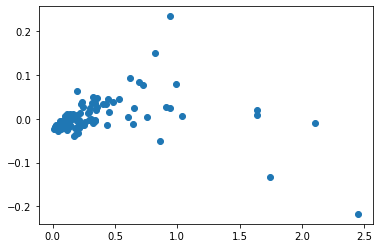

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
model = LinearRegression(fit_intercept=True)
x = xy[['RCR FORECAST']]
y = xy['N_Interventi_priv']
model.fit(x,y)
yp = model.predict(x)
xy['RESID'] = y - yp
plt.scatter(x,xy['RESID'])
plt.show()

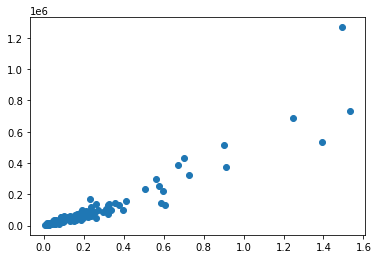

In [7]:
plt.scatter(xy['N_Interventi'],xy['Eur_Interventi'])

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


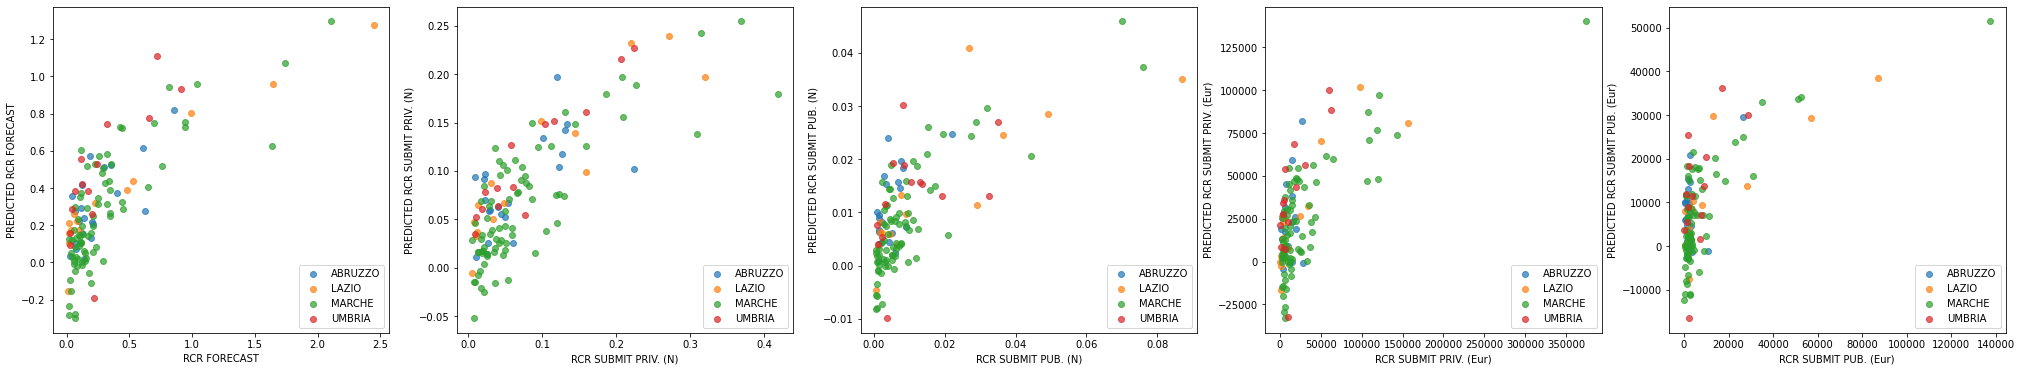

In [12]:

# DIVERSE POSSIBILITA PER LA X DELLA REGRESSIONE
regioni_cols = ['ABRUZZO', 'LAZIO', 'MARCHE', 'UMBRIA']

xy['NEG_MPE_INIT'] = -1 * xy['MPE_INIT']
xy['NEG_MPE_END']= -1 * xy['MPE_END']

feat = ['DISTANCE FROM EPICENTER','ALT_MED']+['MPE_INIT','MPE_END']+ateco_names
#+['INDUSTRIES','URBANIZATION']
#regioni_cols+['INDUSTRIES','URBANIZATION']

#x = xy.loc[:,x_regression.columns].drop(,axis='columns')
x = xy.loc[:,feat]
x = sm.add_constant(x)


# TS SONO LE Y DELLA REGRESSIONE, FACCIO UNA REGRESSIONE PER OGNI ELEMENTO DI TS
# E GENERO UN MODELLO DI CONSEGUENZA

#ts = ['N_Interventi_priv','Eur_Interventi_priv']
#ts = ['RCR FORECAST','N_Interventi', 'Eur_Interventi']
#ts = ['N_Interventi_priv','Eur_Interventi_priv']
#ts = ['RCR FORECAST','N_Interventi_priv','N_Interventi_pubb']
ts = ['RCR FORECAST','N_Interventi_priv','N_Interventi_pubb','Eur_Interventi_priv', 'Eur_Interventi_pubb']

new_names = {
    'RCR FORECAST':'RCR FORECAST',
    'N_Interventi_priv':'RCR SUBMIT PRIV. (N)',
    'Eur_Interventi_priv':'RCR SUBMIT PRIV. (Eur)',
    'N_Interventi_pubb':'RCR SUBMIT PUB. (N)',
    'Eur_Interventi_pubb':'RCR SUBMIT PUB. (Eur)'
}

#ts = ['DELTA FORECAST ACTUAL', 'DELTA G DAMAGE Interventi', 'P RCR']

models = []

plt.figure(figsize = (7*len(ts),6))
for i in range(len(ts)):
    t = ts[i]
    y = xy.loc[:,t] 
    model = sm.OLS(y, x).fit()
    models.append(model)
    yp = model.predict(x)
    plt.subplot(1,len(ts),i+1)
    for r in regioni_cols:
        x_ = xy.loc[xy[r]==1,:]
        plt.scatter(y[x_.index],yp[x_.index],alpha=0.7,label=r)
    plt.xlabel(new_names[y.name])
    plt.ylabel('PREDICTED '+new_names[y.name])
    plt.legend(loc='lower right')
plt.savefig('images/sisma16_regioni_2.pdf',bbox_inches='tight')  
plt.show()




In [13]:
stargazer = Stargazer(models)
stargazer.custom_columns(ts,[1]*len(ts))
stargazer.covariate_order(feat)
stargazer.show_model_numbers(False)
stargazer.show_degrees_of_freedom(False)
with open('models/sisma16.tex','w') as f:
    f.write(stargazer.render_latex())
stargazer

# EXTRA ANALYSIS

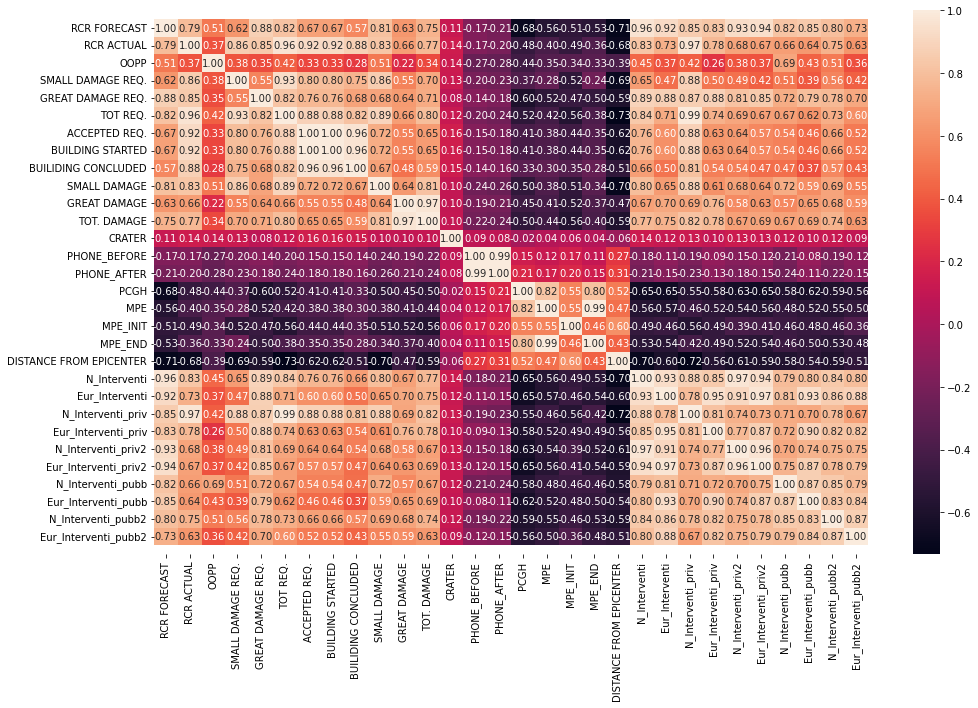

In [14]:
fig = plt.figure(figsize=(16,10))
font = {'size'   : 10}
correlation_mat = xy[['RCR FORECAST', 'RCR ACTUAL', 'OOPP', 'SMALL DAMAGE REQ.',
       'GREAT DAMAGE REQ.', 'TOT REQ.', 'ACCEPTED REQ.', 'BUILDING STARTED',
       'BUILIDING CONCLUDED', 'SMALL DAMAGE', 'GREAT DAMAGE', 'TOT. DAMAGE',
       'CRATER', 'PHONE_BEFORE', 'PHONE_AFTER', 'PCGH', 'MPE', 'MPE_INIT',
       'MPE_END', 'DISTANCE FROM EPICENTER','N_Interventi', 'Eur_Interventi', 'N_Interventi_priv',
       'Eur_Interventi_priv', 'N_Interventi_priv2', 'Eur_Interventi_priv2',
       'N_Interventi_pubb', 'Eur_Interventi_pubb', 'N_Interventi_pubb2',
       'Eur_Interventi_pubb2']].corr()
ax = sns.heatmap(correlation_mat, annot = True,fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

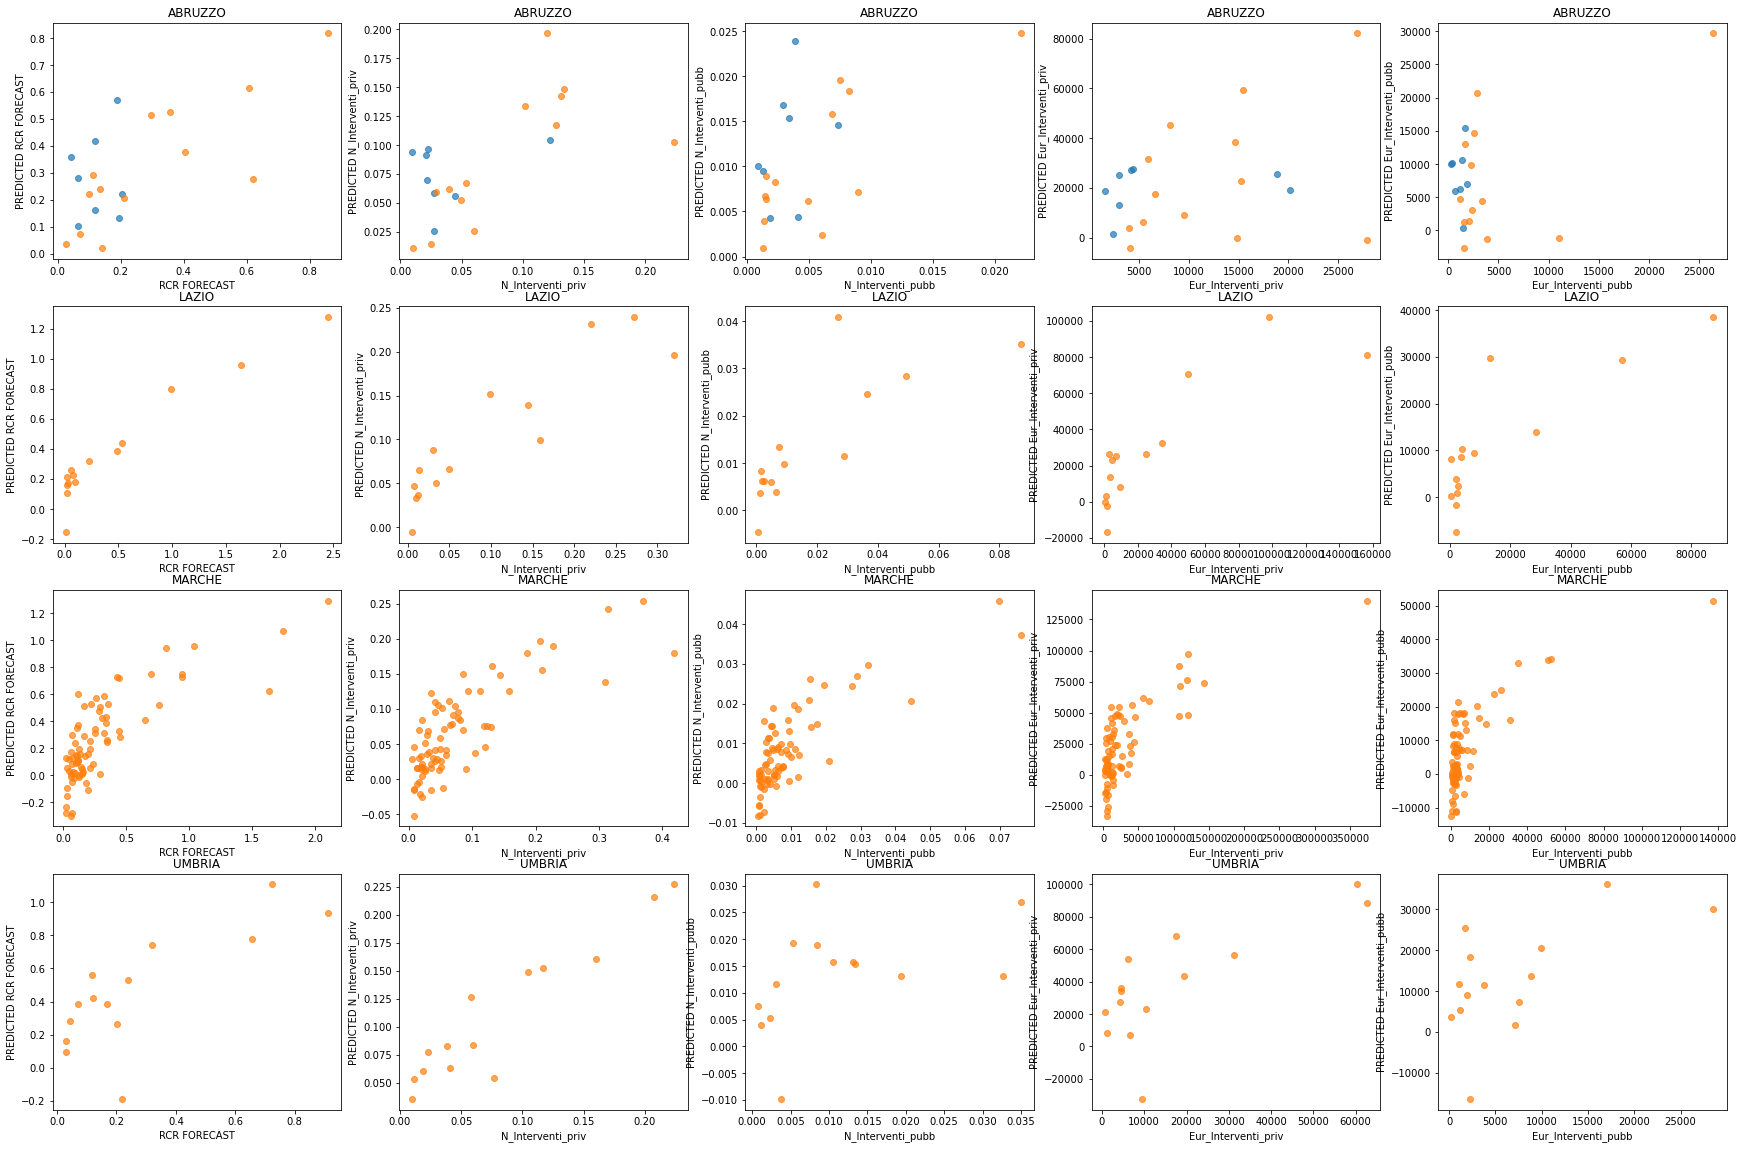

In [15]:
plt.figure(figsize = (6*len(ts), 20))
k = 1
for c in regioni_cols:
    for j in range(len(ts)):
        t = ts[j]
        y = xy.loc[:,t] 
        yp = models[j].predict(x)
        plt.subplot(len(regioni_cols),len(ts),k)
        z = xy.loc[xy[c]==1,:]
        plt.scatter(y[z.loc[z['CRATER']==0,:].index],yp[z.loc[z['CRATER']==0,:].index],alpha=0.7)
        plt.scatter(y[z.loc[z['CRATER']==1,:].index],yp[z.loc[z['CRATER']==1,:].index],alpha=0.7)
        plt.xlabel(y.name)
        plt.ylabel('PREDICTED '+y.name)
        plt.title(c)
        k += 1
plt.savefig('images/sisma16_regioni.pdf',bbox_inches='tight')  
plt.show()


C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


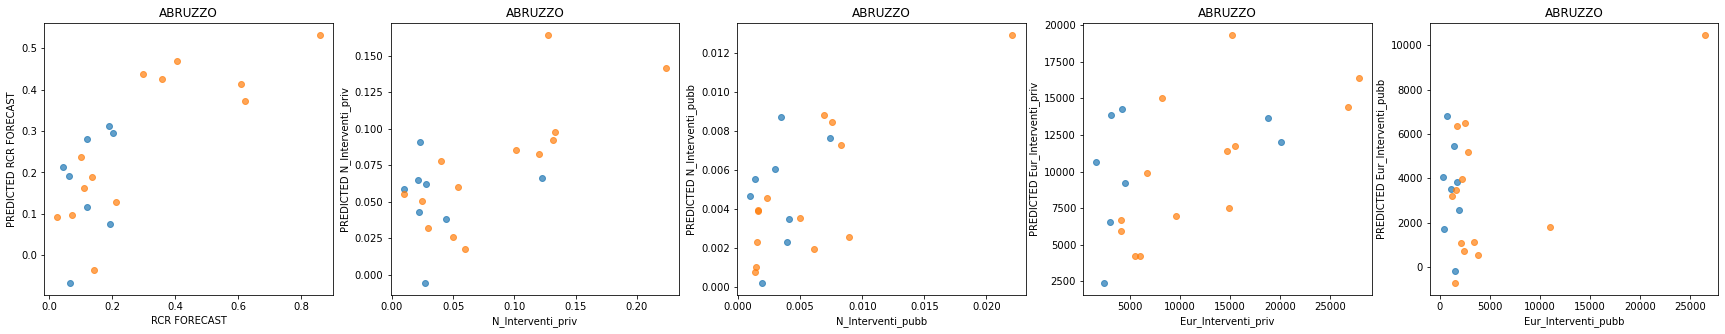

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


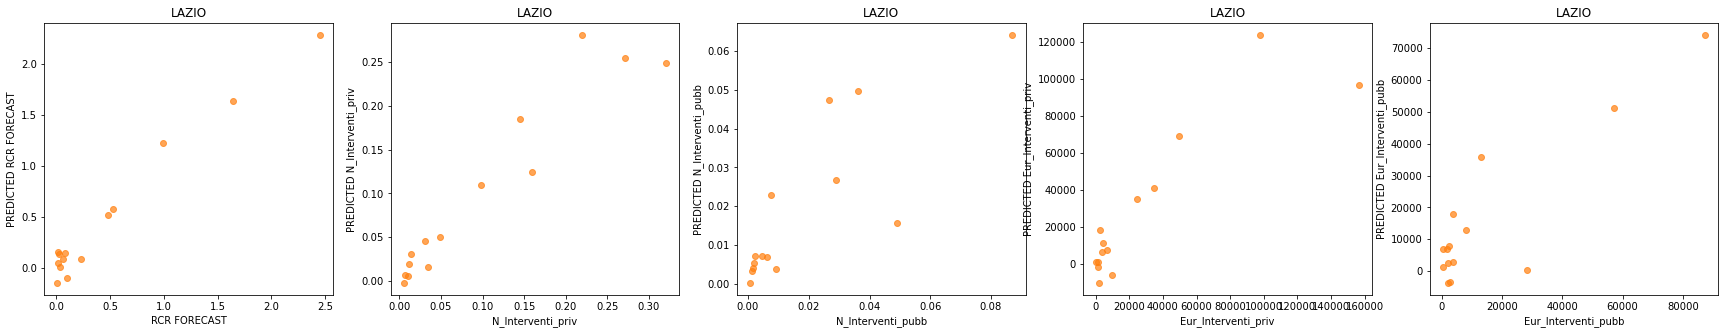

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


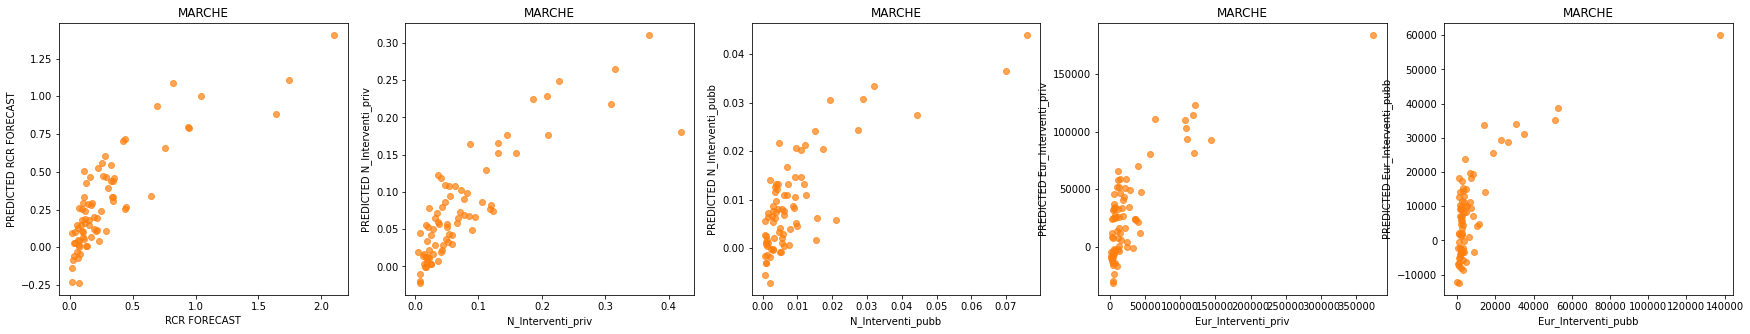

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


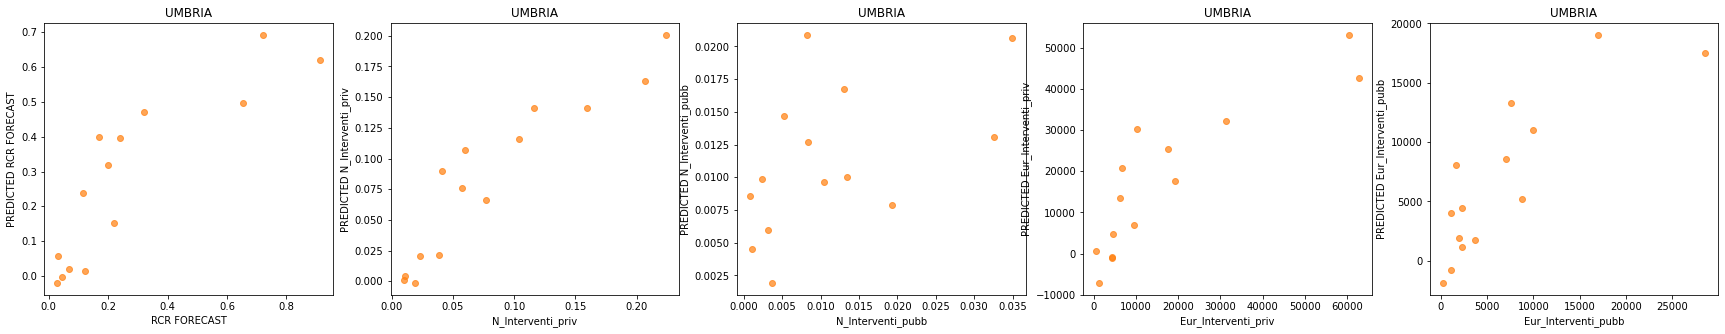

In [18]:
feat = ['DISTANCE FROM EPICENTER','ALT_MED']+['MPE_INIT','MPE_END']
for r in regioni_cols:
    x = xy.loc[xy[r]==1,feat]
    x = sm.add_constant(x)
    models = []
    plt.figure(figsize = (6*len(ts), 5))
    for i in range(len(ts)):
        z = xy.loc[xy[r]==1,:]
        t = ts[i]
        y = z.loc[:,t] 
        model = sm.OLS(y, x).fit()
        models.append(model)
        yp = model.predict(x)
        plt.subplot(1,len(ts),i+1)
        plt.scatter(y[z.loc[z['CRATER']==0,:].index],yp[z.loc[z['CRATER']==0,:].index],alpha=0.7)
        plt.scatter(y[z.loc[z['CRATER']==1,:].index],yp[z.loc[z['CRATER']==1,:].index],alpha=0.7)
        plt.xlabel(y.name)
        plt.ylabel('PREDICTED '+y.name)
        plt.title(r)
    plt.savefig('images/sisma16_'+r+'.pdf',bbox_inches='tight')  
    plt.show()
    # REGIONI INDIVIDUALI
    stargazer = Stargazer(models)
    stargazer.custom_columns(ts,[1]*len(ts))
    stargazer.covariate_order(feat)
    stargazer.show_model_numbers(False)
    stargazer.show_degrees_of_freedom(False)
    with open('models/sisma16_'+r+'.tex','w') as f:
        f.write(stargazer.render_latex())
    stargazer